# Conceptos fundamentales del análisis y la ciencia de datos enfocado a las entrevistas de trabajo
En esta agrupación de conceptos clave sobre el análisis y la ciencia de datos voy a escribir definiciones y responder preguntas. Acompañaré el código de explicaciones en caso de ser necesario. Este es un proyecto personal que tiene como objetivo mantener conceptos fundamentales siempre presentes. No tiene ningún tipo de orden. Este archivo se puede utilizar como una obra de consulta. Está orientado a las entrevistas de trabajo.

## 1. ¿Qué es un DataFrame?
Un DataFrame en Pandas es una estructura de datos bidimensional similar a una tabla. Permite manipular datos organizados en filas y columnas. Es la herramienta principal en el análisis de datos en Python. Tiene muchas posibilidades y funciones, como reorganizar la información, transformarla, combinarla, promediarla, etc. Cada columna de un DataFrame puede contener diferentes tipos de datos. 

Hagamos una tabla a partir de un diccionario con la función `pd.DataFrame.from_dict`:

In [1]:
import pandas as pd

data = {'a': [1, 2, 3],
       'b': [4, 5 ,6]}

# Aquí ocurre la magia.
df = pd.DataFrame.from_dict(data)

# Impresión.
display(df)

,a,b
0,1,4
1,2,5
2,3,6


In [2]:
# Ahora hagamos una tabla a partir de una lista:

data = [['a', 'b'], [1, 2], [3, 4], [5, 6]]

# La primera fila en una nueva variable, para ser usada como los nombres de las columnas.
column_names = data[0]

# El resto como datos.
data_rows = data[1:]

df = pd.DataFrame(data_rows, columns = column_names)

display(df)

,a,b
0,1,2
1,3,4
2,5,6


## 2. ¿Cómo prepararías u organizarías un conjunto de datos utilizando Python?
Empezaría por familiarizarme con el _DataFrame_. Puedo usar métodos como `describe()`, `head()`, `info()`, etc. Así conozco el tipo de datos que tengo, los imprimo y también puedo obtener algunas estadísticas matemáticas que me ayuden a conocer mejor el conjunto de datos.

In [3]:
import pandas as pd

# Crear un diccionario con listas como valores, las claves serán los nombres de columnas.
data = {'a': [1, 2, 3],
        'b': [4, 5, 6]}

# Crear el DataFrame directamente desde el diccionario.
df = pd.DataFrame(data)

# Mostrar estadísticas descriptivas del DataFrame.
print('Esto veremos con `describe()`')
print(df.describe())
print()

# Mostrar las primeras filas del DataFrame.
print('Esto veremos con `head()`')
print(df.head())
print()

# Mostrar información general del DataFrame.
print('Esto veremos con `info()`')
print(df.info())


Esto veremos con `describe()`
         a    b
count  3.0  3.0
mean   2.0  5.0
std    1.0  1.0
min    1.0  4.0
25%    1.5  4.5
50%    2.0  5.0
75%    2.5  5.5
max    3.0  6.0

Esto veremos con `head()`
   a  b
0  1  4
1  2  5
2  3  6

Esto veremos con `info()`
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int64
 1   b       3 non-null      int64
dtypes: int64(2)
memory usage: 180.0 bytes
None


Podría continuar utilizando `isnull()` y `sum()` o `duplicated()` para ver si hay datos nulos y duplicados.

Puedo eliminar datos con `dropna()` o sustituirlos con `fillna()`. Incluso podría entrenar un modelo predictivo para predecir valores restantes.

In [4]:
print('¿Cuántos datos nulos tenemos?')
print(df.isnull().sum())
print()
print('¿Cuántos datos duplicados tenemos?')
print(df.duplicated().sum())

¿Cuántos datos nulos tenemos?
a    0
b    0
dtype: int64

¿Cuántos datos duplicados tenemos?
0


Cuando esté seguro de que tengo información de calidad, he sustituido valores ausentes y duplicados o los he eliminado, podré continuar mi análisis con información de calidad. Todos los cambios se deben documentar.

## 3. ¿Qué es una consulta SQL y cómo describirías una para extraer datos específicos de una base de datos?
Una consulta SQL es una instrucción que usamos para pedir información específica de una base de datos. La consulta más común es `SELECT`, la cual nos permitiría extraer columnas y filas. A continuación un ejemplo.

In [ ]:
SELECT nombre, edad
FROM clientes
WHERE edad > 25
ORDER BY edad ASC;

Así es como podemos obtener el nombre y la edad de un usuario que forma parte de la tabla clientes siempre y cuando su edad sea mayor a 25 años. En la consulta ordenamos de manera ascendente con base en la edad.

También podemos usar `GROUP BY` para agrupar datos, como contar clientes por ciudad:

In [ ]:
SELECT ciudad, COUNT(*)
FROM clientes
GROUP BY ciudad;

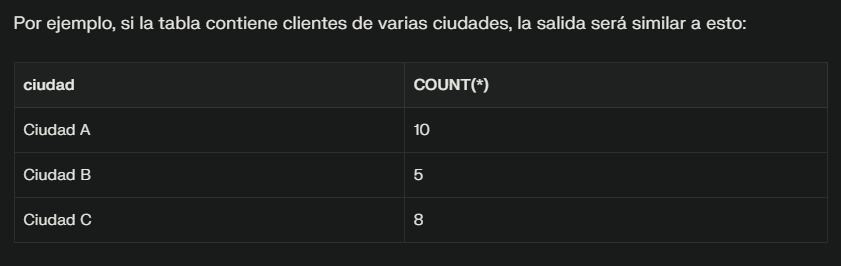

## 4. ¿Cómo realizarías un análisis exploratorio de datos (EDA) y qué tipo de estadísticas o visualizaciones usarías?
Primero reviso la estructura y calidad de los datos con métodos como `head()`, `info()` o `describe()`. Después identifico datos nulos y duplicados. Después de esta corrección inicial analizaré variables estadísticas como la media, mediana, desviación estándar, etc.

Para visualizar usaría gráficos simples como histogramas para distribuciones, diagramas de caja para detectar _outliers_ y gráficos de dispersión para detectar relaciones entre variables. Así comienzo a formular hipótesis.

## 5. ¿Qué es la desviación estándar?
Es una medida estadística que indica cuánto se dispersan, en promedio, los datos respecto a su media (promedio). Una desviación estándar baja significa que los datos están muy agrupados cerca de la media, mientras que una desviación estándar alta indica que están más dispersos o alejados del promedio.
La desviación estándar es más fácil de interpretar que la varianza porque se expresa en las mismas unidades que los datos originales. La varianza se expresa en unidades al cuadrado.

In [5]:
# Vamos a importar 'numerical Python'.
import numpy as np

# Con NumPy podemos crear una semilla. Usaremos 42 como argumento para obtener resultados reproducibles.
np.random.seed(42)

# Creamos la variable `heights`, la cual contiene 100 estaturas aleatorias que tienen como promedio 1.70, desviación 0.08.
# Se trata de una distribución normal de números aleatorios.
heights = np.round(np.random.normal(loc=1.70, scale=0.08, size=100), 2)


# Volvemos a `heights` una lista.
heights_list = heights.tolist()

# Impresión de la lista
print('Conjunto de datos:')
print(heights_list)

# Creamos una nueva variable que no dé la desviación estándar.
std = np.std(heights_list, ddof=1)  # ddof=1 para desviación estándar muestral
print()
print("Desviación estándar:", std)


Conjunto de datos:
[1.74, 1.69, 1.75, 1.82, 1.68, 1.68, 1.83, 1.76, 1.66, 1.74, 1.66, 1.66, 1.72, 1.55, 1.56, 1.66, 1.62, 1.73, 1.63, 1.59, 1.82, 1.68, 1.71, 1.59, 1.66, 1.71, 1.61, 1.73, 1.65, 1.68, 1.65, 1.85, 1.7, 1.62, 1.77, 1.6, 1.72, 1.54, 1.59, 1.72, 1.76, 1.71, 1.69, 1.68, 1.58, 1.64, 1.66, 1.78, 1.73, 1.56, 1.73, 1.67, 1.65, 1.75, 1.78, 1.77, 1.63, 1.68, 1.73, 1.78, 1.66, 1.69, 1.61, 1.6, 1.77, 1.81, 1.69, 1.78, 1.73, 1.65, 1.73, 1.82, 1.7, 1.83, 1.49, 1.77, 1.71, 1.68, 1.71, 1.54, 1.68, 1.73, 1.82, 1.66, 1.64, 1.66, 1.77, 1.73, 1.66, 1.74, 1.71, 1.78, 1.64, 1.67, 1.67, 1.58, 1.72, 1.72, 1.7, 1.68]

Desviación estándar: 0.07306535057430064


A continuación haré exactamente lo mismo, pero sin crear la lista con NumPy.

In [7]:
# Vamos a importar 'numerical Python'.
import numpy as np

# Con NumPy podemos crear una semilla. Usaremos 42 como argumento para obtener resultados reproducibles.
np.random.seed(42)

# Creamos la variable `heights`, la cual contiene 100 estaturas aleatorias que tienen como promedio 1.70, desviación 0.08.
# Se trata de una distribución normal de números aleatorios.
heights = [1.72, 1.84, 1.56, 1.69, 1.81, 1.73, 1.62, 1.76, 1.66, 1.79,
           1.68, 1.58, 1.75, 1.72, 1.62, 1.68, 1.71, 1.88, 1.70, 1.73,
           1.54, 1.83, 1.61, 1.78, 1.65, 1.66, 1.67, 1.85, 1.63, 1.74,
           1.75, 1.80, 1.77, 1.79, 1.60, 1.68, 1.81, 1.64, 1.67, 1.86,
           1.62, 1.69, 1.83, 1.73, 1.72, 1.76, 1.79, 1.58, 1.80, 1.68,
           1.69, 1.65, 1.73, 1.87, 1.61, 1.69, 1.81, 1.70, 1.64, 1.60,
           1.78, 1.86, 1.84, 1.66, 1.78, 1.71, 1.63, 1.67, 1.68, 1.74,
           1.64, 1.89, 1.61, 1.77, 1.54, 1.80, 1.67, 1.59, 1.68, 1.87,
           1.75, 1.55, 1.85, 1.69, 1.66, 1.70, 1.73, 1.83, 1.80, 1.62,
           1.70, 1.86, 1.65, 1.78, 1.76, 1.77, 1.69, 1.81, 1.77, 1.82]




# Impresión de la lista
print('Conjunto de datos:')
print(heights)

# Creamos una nueva variable que no dé la desviación estándar.
std = np.std(heights, ddof=1)  # ddof=1 para desviación estándar muestral
print()
print("Desviación estándar:", std)


Conjunto de datos:
[1.72, 1.84, 1.56, 1.69, 1.81, 1.73, 1.62, 1.76, 1.66, 1.79, 1.68, 1.58, 1.75, 1.72, 1.62, 1.68, 1.71, 1.88, 1.7, 1.73, 1.54, 1.83, 1.61, 1.78, 1.65, 1.66, 1.67, 1.85, 1.63, 1.74, 1.75, 1.8, 1.77, 1.79, 1.6, 1.68, 1.81, 1.64, 1.67, 1.86, 1.62, 1.69, 1.83, 1.73, 1.72, 1.76, 1.79, 1.58, 1.8, 1.68, 1.69, 1.65, 1.73, 1.87, 1.61, 1.69, 1.81, 1.7, 1.64, 1.6, 1.78, 1.86, 1.84, 1.66, 1.78, 1.71, 1.63, 1.67, 1.68, 1.74, 1.64, 1.89, 1.61, 1.77, 1.54, 1.8, 1.67, 1.59, 1.68, 1.87, 1.75, 1.55, 1.85, 1.69, 1.66, 1.7, 1.73, 1.83, 1.8, 1.62, 1.7, 1.86, 1.65, 1.78, 1.76, 1.77, 1.69, 1.81, 1.77, 1.82]

Desviación estándar: 0.08674093554366301


## 6. ¿Qué es la campana de Gauss?
Se le llama campana de Gauss a una __distribución normal__. Es una función matemática que describe cómo destribuyen datos en un estudio estadístico. Es una gráfica simétrica, con forma de campana. Media, mediana y moda coinciden en el centro. Estaturas, calificaciones, errores de medición, puntajes de exámenes, y más, suelen agruparse alrededor de un valor promedio.

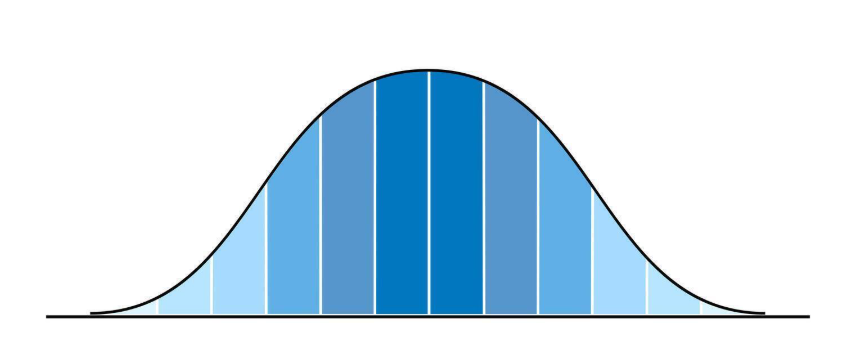

Podemos crear nuestro propia campana de Gauss así.

In [30]:
# Pandas y NumPy, tus mejores amigos.
import pandas as pd
import numpy as np

# Generar datos siguiendo una distribución normal.
np.random.seed(42) # Esto es una semilla generada con NumPy. El número de semilla es 42 (triple ten), para poder replicar resultados.

# Aquí creamos el DataFrame. Es un DataFrame de alturas. La media es 1.70, con una variación estándar de 0.08 y 1000 entradas. Lo números se redondean a dos decimales.
df = pd.DataFrame({'altura': np.round(np.random.normal(loc=1.70, scale=0.08, size=1000), 2)})

# Guardamos como CSV.
df.to_csv('alturas_normales.csv', index=False)


Ahora vamos a imprimir el DataFrame, pero también un histograma. Los datos se encuentran alrededor del dato 1.70. Una distribución normal, simétrica y bella.

Ésta es una impresión del DataFrame:
   altura
0    1.74
1    1.69
2    1.75
3    1.82
4    1.68
Axes(0.125,0.11;0.775x0.77)


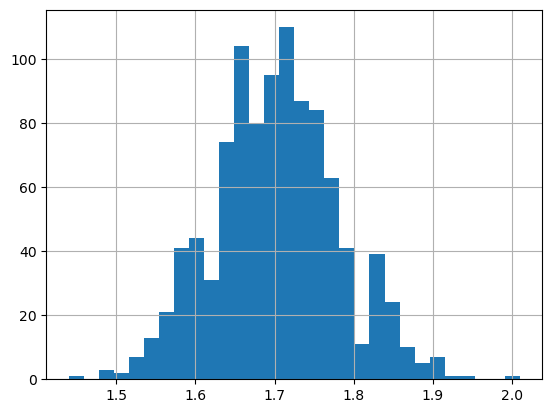

In [31]:
# Creamos la variable del DataFrame
df = pd.read_csv('alturas_normales.csv')

# Creamos una variable para el histograma.
histograma = df['altura'].hist(bins=30)

# Impresión y gráfica.
print('Ésta es una impresión del DataFrame:')
print(df.head())
print(histograma)

## 7. ¿Qué es una correlación y cómo interpretas el coeficiente de correlación en un análisis de datos?
Una correlación es una medida estadística que indica qué tan fuerte es la relación lineal entre dos variables. El coeficiente de correlación, que oscila entre -1 y 1, nos indica si hay una relación lineal o no. Un valor cercano a 0 indica que no hay una relación lineal clara entre las variables. Un valor de 1 indica una correlación positiva perfecta y una valor de -1 indica una correlación negativa perfecta. 

- Como ejemplo de dos variables con alta correlación positiva tenemos a la estatura y el peso. Generalmente las personas altas pesan más y las pequeñas menos.

- Como ejemplo de dos variables con alta correlación negativa tenemos el la cantidad de ejercicio física y peso corporal. Entre mayor cantidad de ejercicio, el peso suele disminuir.

- Como ejemplo de dos variables con nula correlación tenemos el número de zapatos y las notas escolares. Son variables independientes sin una relación directa entre ellas.

In [22]:
import pandas as pd

# Crear un DataFrame de ejemplo. Es un diccionario. La llave será el nombre de la columna, y los valores de las listas las alturas.
data = {'altura': [1.70, 1.75, 1.72, 1.80, 1.65, 1.70],
        'peso': [65, 70, 68, 75, 60, 70]}

# Creamos la variable del DataFrame con la información del diccionario.
df = pd.DataFrame(data)

# Calcular la correlación con el método `corr()`. Basta con filtrar las variables `'altura'` y `'peso'` y usar `corr()`.
correlacion = df['altura'].corr(df['peso'])
print("Coeficiente de correlación:", correlacion)


Coeficiente de correlación: 0.923076923076923


## 8. ¿Qué es la regresión lineal?
La regresión lineal es un __modelo estadístico__ que permite modelar la relación entre una variable dependiente (por ejemplo peso) y una o más variable independeintes (por ejemplos altura, sexo, edad, etc.) Su objetivo es encontrar la mejor línea recta que predice el valor de la variable dependiente (variable objetivo) a partir de las variables independientes (características). Dentro del aprendizaje automático es considerada aprendizaje supervisado.

Si hay solo una variable independiente, se llama regresión lineal simple.

Sirve para predecir resultados continuos y analizar tendencias, partiendo de la suposición de que la relación entre las variables en lineal.

En este siguiente modelo, predecimos cuántas ventas se pueden generar si inviertes 6 mil en publicidad.

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression # Así se importa el modelo de regresión lineal de `sklearn`.

# Datos de ejemplo.
publicidad = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # Gasto en publicidad (en miles).
ventas = np.array([4, 6, 7, 10, 12]) # Ventas (en unidades).

# Crear y ajustar el modelo
modelo = LinearRegression()
modelo.fit(publicidad, ventas)

# Predicción de las ventas si se gastan 6 mil en publicidad.
gasto_nuevo = np.array([[6]])
prediccion = modelo.predict(gasto_nuevo)

print("Si gasto 6 mil en publicidad, espero vender aproximadamente:", int(prediccion[0]), "unidades.")


Si gasto 6 mil en publicidad, espero vender aproximadamente: 13 unidades.


El siguiente modelo es el mismo, pero ahora vamos a graficar la línea de nuestra regresión lineal.

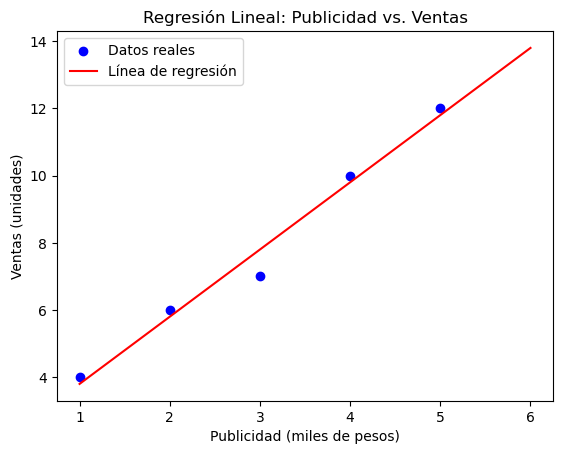

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos de ejemplo.
publicidad = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
ventas = np.array([4, 6, 7, 10, 12])

# Crear y ajustar el modelo.
modelo = LinearRegression()
modelo.fit(publicidad, ventas)

# Crear valores para la línea.
x_linea = np.linspace(1, 6, 100).reshape(-1, 1)
y_linea = modelo.predict(x_linea)

# Graficar los puntos originales y la línea de regresión
plt.scatter(publicidad, ventas, color='blue', label='Datos reales')
plt.plot(x_linea, y_linea, color='red', label='Línea de regresión')
plt.xlabel('Publicidad (miles de pesos)')
plt.ylabel('Ventas (unidades)')
plt.title('Regresión Lineal: Publicidad vs. Ventas')
plt.legend()
plt.show()


## 9. ¿Qué es un `array` en `NumPy` y cuál es su diferencia con las listas en _Python_?
Un `array` en `NumPy` es una estructura de datos que almacena una colección homogénea de elementos (todos del mismo tipo) organizados en una o más dimensiones. A diferencia de las listas de Python, los arrays son mucho más eficientes para almacenar y realizar cálculos rápidos sobre grandes cantidades de números.

Son la forma más eficiente y rápida de manejar colecciones de datos numéricos, multidimensionales, para facilitar el procesamiento matemático y estadístico.

Un `array` puede ser unidimensional, así como una lista en Python:

In [34]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
print(a)

[1 2 3 4 5]


Pero un `array` también puede tener múltiples dimensiones, como una matriz (array 2D):

In [35]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(b)

[[1 2 3 4]
 [5 6 7 8]]


## 10. ¿Cómo definirías a los strings y las listas y cuáles son sus similitudes y diferencias?
Un `string` o cadena de texto es una secuencia ordenada de caracteres declarada entre comillas. Son útiles para representar texto y aunque se pueden indexar y dividir en partes, son inmutables.

Las listas son secuencias ordenadas de elementos; se declaran entre corchetes. Las listas son mutables. Sus elementos pueden ser de cualquier tipo.

Ambas permiten __slicing__ y tienen una longitud.

In [44]:
# Aquí va una cadena de texto.
texto = 'Hola, cuate. Soy Roberto.'
lista = [1, 2, 3, 4]

#Impresiones con 'slicing'.
print(texto[5 : 10]) 
print(lista[1 : 2])

 cuat
[2]


## 11. ¿Qué es una lista anidada?
Una lista anidada es una lista dentro de otra lista. A través del _slicing_ y del filtrado podemos acceder a sus elementos por separado. Por ejemplo:

In [48]:
lista_anidada = [[1, 2, 3], [4, 5 ,6], [7, 8, 9]]
print(lista_anidada[0][0])

1


## 12. ¿Qué son los bucles for? 
Los bucles for son estructuras de control que te permiten iterar sobre los elementos de una secuencia, como una lista, cadena de texto, etc. Veamos un ejemplo.

In [53]:
# Ésta es una lista y la vamos a recorrer con un bucle for.
nombres = ['Ana', 'Luis', 'Mario']

for nombre in nombres:
    print(f"Hola, {nombre}.")

Hola, Ana.
Hola, Luis.
Hola, Mario.


La variable temporal toma el valor de cada elemento en la secuencia uno por uno. El bloque de código dentro del bucle se ejecuta una vez para cada elemento. Es ideal para trabajos repetitivos.

## 13. ¿Qué es un `f-string`?
Un `f-string` es una forma moderna y eficiente de crear cadenas de texto que incluyen variables. Para usarlo debemos colocar la letra `f` antes de las comillas que definen la cadena y encerrar las expresiones o variable entre llaves.

In [54]:
variable = 'Roberto'

print(f"Mi nombre es {variable}.")

Mi nombre es Roberto.


## 14. ¿Qué son los bucles _while_?
Un bucle _while_ es una estructura de control que repite un bloque de código __mientras una condición sea verdadera__. El bloque se ejecuta una y otra vez, ya que la condición se vuelve a evaluar una vez que termina. Cuando la condición pasa a ser falsa, el bucle termina y el programa continua. Su sintaxis es:

In [ ]:
while condición:
    # Código que se repite.

Veamos un ejemplo simple:

In [56]:
# Una variable que contiene al número 3.
contador = 3

# En cada iteración, si es que contador es mayor que 0, va a imprimir el contador, pero después de restarle un número para cada iteración.
while contador > 0:
    print(contador)
    contador -= 1

3
2
1


Una traducción literal para la palabra _while_ es __mientras__. Lo que decimos en un bucle _while_ podría traducirse como: '__mientras__ tal condición se cumpla, repite este código'. Aquí otro ejemplo.

In [58]:
# Tenemos como entrada un string vacío.
entrada = ""

# Nuestro ciclo while dice: 'mientras la 'entrada' no sea igual al texto `salir`, repite el código.'
while entrada != "salir":
    entrada = input("Escribe 'salir' para terminar: ")

# Una vez que la condición se cumpla y estemos a fuera del bucle while, se hará la impresión.
print("¡Fin del ciclo!")


Escribe 'salir' para terminar:  ¿Cómo?
Escribe 'salir' para terminar:  Entiendo. Lo haré.
Escribe 'salir' para terminar:  salir


¡Fin del ciclo!


## 15. ¿Qué son las estructuras condicionales `else` y `elif`?
Las estructuras condicionales `else` y `elif` permiten que el código responda a diferentes situaciones según se cumplan ciertas condiciones.

- __`elif`__ es la abreviatura de `else if`. Se usa cuando quieres comprobar varias condiciones en secuencia.
- __`else`__ se usa al final de una cadena de condiciones y se ejecuta solo si ninguna de las condiciones anteriores se cumple. Es opcional y sólo sale una vez al final.

Veamos un ejemplo:

In [7]:
# Hagamos que el usuario escriba una temperatura con `input()`. Debemos transformar la entrada a número con `float()`.
temperatura = float(input('¿Cuál es la temperatura?'))

# 'Si el número es mayor a 34 entonces imprime...'
if temperatura > 34:
    print('Hace mucho calor.')

# 'Si el número es mayor a 25 entonces imprime...'
elif temperatura > 24:
    print('Hace calor.')

# 'Si el número es mayor a 15 entonces imprime...'
elif temperatura > 15:
    print('Hace frío.')

# 'Para cualquier otra condición imprime...'
else:
    print('Hace mucho frío.')


¿Cuál es la temperatura? 5


Hace mucho frío.


Las condiciones se evalúan de arriba hacia abajo. Si ninguna condición es verdadera se ejecuta el bloque en `else`.

## 16. Explícame los operadores lógicos y de condición en Python:
Los operadores lógicos y de condición permiten construir expresiones que toman decisiones según si se cumplen o no ciertas condiciones. Se usan en instrucciones como `if`, `while` y bucles para controlar el flujo del programa.

- __`and`__: Devuelve `True` si ambas condiciones son verdaderas.

Ejemplo: `(5 > 3) and (2 < 10)` es `True` porque ambas comparaciones lo son.

- __`or`__: Devuelve `True` si al menos una condición es verdadera.

Ejemplo: `(5 > 8) or (2 < 10)` es `True` porque la segunda comparación lo es.

- __`not`__: Niega la condición; convierte `True` en `False` y viceversa.

Ejemplo: `not (5 > 8)` es `True` porque `5 > 8` es falso.​

In [8]:
edad = 20
es_estudiante = True
if edad > 18 and es_estudiante:
    print("Acceso especial")  # Solo si ambas condiciones son `True`.

llueve = False
hace_frio = True
if llueve or hace_frio:
    print("Lleva abrigo o paraguas")  # Si alguna es `True`.

usuario_activo = False
if not usuario_activo:
    print("El usuario está inactivo")  # Solo si es `False`.


Acceso especial
Lleva abrigo o paraguas
El usuario está inactivo


Los operadores lógicos y condición simplemente comparan valores y devuelve `True` o `False`.

- `==` : Igualdad (`x == y`)

- `!=` : Distinto (`x != y`)

- `>` : Mayor que (`x > y`)

- `<` : Menor que (`x < y`)

- `>=` : Mayor o igual (`x >= y`)

- `<=` : Menor o igual (`x <= y`)

Los operadores de pertenencia te dejan saber si un elemento está en una secuancia o no:

- `in`: Devuelve `True` si un elemento está en una secuencia.

- `not in`: Devuelve `True` si no está en la secuencia.

In [2]:
# Una lista de nombres.
nombres = ["Ana", "Luis"]

# Usaremos el operador de pertenencia `in` para saber si 'Luis' está presente en la lista.
if "Luis" in nombres:
    print("Luis está en la lista")


Luis está en la lista


## 17. ¿Qué es un diccionario en Python?
Es una estructura de datos que almacena pares de __clave-valor__, donde cada llave es única e inmutable. Nos permite acceder a sus valores rápidamente usando la clave. Se representan con llaves: `{}`, por ejemplo.

In [4]:
# Sí, esto es un diccionario. Llaves. Claves-valores.
diccionario = {'nombre': 'Roberto',
              'edad': 29,
              'país': 'México'}

# Puedo acceder a los elementos de un diccionario filtrando con la clave.
print(diccionario['país'])

México


Los valores de un diccionario pueden ser de cualquier tipo, incluso otros diccionarios. Podemos modificar valores:

In [5]:
# Filtremos la clave 'edad' y modifiquemos el valor.
diccionario['edad'] = 28

# Comprobación.
print(diccionario)

{'nombre': 'Roberto', 'edad': 28, 'país': 'México'}


Los diccionarios son estructuras de datos con acceso eficiente a valores gracias a las claves.

## 18. ¿Qué es una comprehensión de listas?
Es una forma elegante y compacta de crear listas a partir de iterables —como listas, rangos o cadenas— a través de una sola línea de código. Permite aplicar operaciones y condiciones durante la creación de una lista.

La siguiente comprehensión de listas nos devolverá el cuadrado de números:

In [10]:
lista = [x**2 for x in range(5)]  # [0, 1, 4, 9, 16]
print(lista)

[0, 1, 4, 9, 16]


La siguiente comprehensión de lista nos devolverá números pares.

In [12]:
lista = [x for x in range(10) if x % 2 == 0]  # [0, 2, 4, 6, 8]
print(lista)

[0, 2, 4, 6, 8]


La siguiente comprehensión de listas itera sobre una existente lista de nombres y crea una nueva lista con los nombres en mayúsculas.

In [14]:
nombres = ["Ana", "Luis", "Marta"]
nuevos = [nombre.upper() for nombre in nombres]  # ['ANA', 'LUIS', 'MARTA']
print(nuevos)

['ANA', 'LUIS', 'MARTA']


## 19. ¿Qué es SQL y por qué es importante para un analista de datos?
SQL significa literalmente _Structured query language_; es decir, un lenguaje de consulta estructurado. Nos permite gestionar y manipular bases de datos relacionales. Es crucial porque nos permite, extraer, transformar y cargar datos antes de nuestro análisis. 

## 20. ¿Cuáles son las diferencias entre `INNER JOIN`, `LEFT JOIN` y `OUTER JOIN`?

- `INNER JOIN`: Devuelve solo los registros que tienen coincidencias en ambas tablas.
- `LEFT JOIN`: Devuelve todos los registros de la tabla izquierda, junto con los registros coincidentes de la tabla derecha. Si no hay coincidencia, los campos de la tabla derecha aparecerán como `NULL`.
- `FULL (OUTER) JOIN`: Devuelve todos los registros de ambas tablas, rellenando con `NULL` si no hay coincidencia en el otro lado.

## 21. ¿Qué bibliotecas de _Python_ usas habitualmente y por qué?
Utilizo `pandas` (panel data) para manipulación y procesamiento de datos; `NumPy` (_numerical Python_) para operaciones matemática eficientes; `Matplotlib` y `seaborn` para visualización de datos y `scikit.learn` o el kit de aprendizaje de ciencia para modelado de `machine-learning`. Todas son herramientas muy robustas, de código abierto y son estándares de la industria.

## 22. ¿Cuéntame cómo te enfrentaste a un proyecto de análisis de datos difícil?
Pienso en el primer proyecto de mi portfolio. Era uno de los proyectos finales de mi bootcamp. En él me estaba familiarizando con el aprendizaje automático no supervisado. En particular con del `clustering`, que nos permite formar grupos con base en datos.

La tarea era dar recomendaciones a un gimnasio para que la tasa de abandono de sus ususarios disminuyera. A través de un conjunto de datos que indicaba qué usuarios habían abandonado el gimnasio y otros datos clave como su frecuencia de visita desarrollé un modelo que además de agrupar a los tipos de usuarios, determinó cuáles eran las variables más importantes asociadas al abandono.

No tuve problemas en mi análisis exploratorio, donde fui capaz comprender la información y graficar para descubrir tendencias y fundamentar mis hipótesis. Pero me faltó una mayor diversidad en mis representaciones visuales. Use mapas de calor, histogramas y diagramas de caja; debí añadir grafícas de barras y diagramas de dispersión para presentar mi información de manera menos repetitiva.

Al final pude recomendar al gimnasio que se concentraran en que los clientes tuvieran altos números de visitas semanales y mensuales a través de un proceso de inicio sin fricciones. Otra características importante que determinaba si el usuario permanecería en el gimansio era la cantidad de dinero que gastaba además de la suscripción, así que recomendé hacer venta cruzada y vender productos útiles para alguien que visita el gimnasio. Además se debía fomentar que los contratos de los usuarios fueran largos. Esto sería posible a través de promociones y descuentos en contratos de mayor duración.

## 23. ¿Cuál es la diferencia entre correlación y causalidad? Da un ejemplo. 
La __correlación__ significa que dos variables tienen una relación estadística: cuando una cambia, la otra tiende a cambiar también, pero no necesariamente una causa a la otra. Por ejemplos, la cantidad de paraguas vendidos y la cantidad de personas que llevan chaquetas en una ciudad: ambos aumentan cuando hace frío o llueve, pero uno no causa al otro.

La __causalidad__ implica que un cambio en una variable provoca directamente un cambio en la otra: existe una relación de causa y efecto. Por ejemplo, sabemos que fumar causa cáncer de pulmón.

A modo de resumen:

- Correlación es “van juntos”, pero podría ser coincidencia o tener una causa común.

- Causalidad es “uno produce el otro”, demostrado experimentalmente.

## 24. ¿Qué es una prueba A/B y para qué sirve?
Una prueba A/B es un experimento donde se comparan dos versiones (A y B) de un elemento (una página web, un botón, un email, etc.) para determinar cuál funciona mejor según una métrica (clics, conversiones).

Se crea una versión control (A) y una variante (B).

Se divide aleatoriamente una muestra de usuarios en dos grupos que ven respectivamente cada versión.

Se mide el comportamiento o resultado de cada grupo y se aplica una prueba estadística para determinar si hay una diferencia significativa.

Sirve para tomar decisiones basadas en datos y no en suposiciones, optimizando rendimiento y experiencia del usuario.

## 25. ¿Qué pruebas estadísticas se usan para comprobar si algo es coincidencia o azar o no?
Para comprobar si una diferencia observada en datos es producto del azar o representa un efecto real, se usan pruebas estadísticas o pruebas de hipótesis. Estas evalúan si los resultados pueden explicarse solo por variabilidad aleatoria o si hay evidencia suficiente para afirmar que hay una relación o diferencia significativa.​

Algunas pruebas estadísticas comunes son:

- Prueba t de Student: compara medias entre dos grupos para ver si difieren significativamente.

- Prueba chi-cuadrado: evalúa asociación entre variables categóricas.

## 26. ¿Qué es la hipótesis nula?
Es un concepto clave en pruebas estadísticas y pruebas A/B. La hipótesis nula afirma que no hay efecto, relación ni diferencia entre los grupos comparados. Es decir, que cualquier diferencia se debe al azar.

Si la diferencia observada es muy poco probable bajo la hipótesis nula, se “rechaza la hipótesis nula” y se concluye que probablemente haya un efecto real, y no solo azar.

## 27. ¿Qué es una base de datos relacional?
Es un tipo de base de datos que almacena y organiza datos en tablas, donde cada tabla está formada por columnas y filas. Los datos de las tablas están relacionados entre sí mediante claves primarias (identificadores únicos de cada fila) y claves externas (referencias a claves primarias en otras tablas).

## 28. ¿Qué son claves primarias y externas?
Una __clave primaria__ es un campo o conjunto de campos en una tabla que identifica de forma única cada registro (fila) dentro de esa tabla. Es decir, no puede haber dos filas con el mismo valor de clave primaria y estos campos no pueden contener datos nulos. Las claves primarias suelen ser usadas para establecer relaciones con otras tablas. Por ejemplo, el número de identificación (id) de una persona podría ser una clave primaria.

Una __clave externa__ es un campo o conjunto de campos en una tabla que se utiliza para establecer y reforzar un vínculo referencial con la clave primaria de otra tabla. la clave externa contiene valores que deben coincidir con los valores existentes en la clave primaria de la tabla relacionada. Con las claves externas se pueden definir relaciones entre tablas.

En resumen, la clave primaria identifica de manera única cada registro de una tabla, mientras que la clave externa es un enlace a esas claves primarias en otras tablas para mantener una relación.

## 29. ¿En qué consiste la metodología _scrum_? 
- La metodología _scrum_ organiza los proyectos en ciclos cortos llamados sprints.
- Permite entregar versiones incrementales del proyecto con constante retroalimentación.
- Facilita la colaboración durante el proyecto.

## 30. ¿En qué consiste la metodología _kanban_?
- Se basa en la visualización del flujo de trabajo con tableros y tarjetas (pendiente, en proceso, terminado).
- Permite gestional tareas de forma ágil y en tiempo real.
- Es útil oara equipos con trabajo continuo y entregas flexibles.

## 31. ¿En qué consiste la metodología _extreme programming_?
- Se enfoca en calidad del código a través de programación en pares.
- Se adapta a ambientes muy cambiantes.
- Busca mejorar la comunicación y los tiempoes de entrega con prácticas rigurosas de testing y feedback continuo.

## 32. ¿Qué es una subconsulta en SQL?
Una subconsulta es una consulta dentro de otra consulta. Va dentro de paréntesis y se usa para devolver resultados que luego son utilizados por la consulta principal. Permite realizar operaciones complejas en un solo paso o dividir una consulta grande en partes más manejables. Éstas son algunos conceptos clave:

- La consulta principal que contiene la subconsulta se llama consulta externa o superconsulta.

- La subconsulta se evalúa primero y su resultado se usa en la consulta externa.

- Se puede usar subconsulta en las cláusulas SELECT, FROM, WHERE, HAVING, e incluso dentro de otras subconsultas.

Las subconsultas permiten usar el resultado de una consulta para filtrar otra consulta de manera dinámica, algo imposible con una consulta directa.

__Ejemplo 1:__ Filtrar empleados que ganan más que el salario promedio:

In [ ]:
SELECT employee_id, name, salary
FROM employees
WHERE salary > (
    SELECT AVG(salary)
    FROM employees
);


La subconsulta `SELECT AVG(salary) FROM employees` calcula el salario promedio de todos los empleados. La consulta externa devuelve a los empleados que ganan más que ese promedio.

__Ejemplo 2__: Listar clientes que hicieron pedidos en un determinado mes:

In [ ]:
SELECT customer_id, customer_name
FROM customers
WHERE customer_id IN (
    SELECT customer_id
    FROM orders
    WHERE order_date BETWEEN '2025-01-01' AND '2025-01-31'
);

La subconsulta obtiene los clientes que realizaron órdenes en enero de 2025. Luego, la consulta externa devuelve los datos completos de esos clientes.

Las subconsultas se usan dentro de consultas mayores para relacionar datos entre tablas y obtener información complementaria o más detallada.

Para seguir profundizando, imaginemos una tabla con calificaciones de un grupo de estudiantes. Podemos calcular el promedio de la calificacación de los estudiantes usando una subconsulta para sumar todas las calificaciones y otras subconsulta para contar en número de estudiantes. Dividiríamos ambos valores y obtendríamos el promedio:

In [ ]:
SELECT
    (SELECT SUM(calificación) FROM estudiantes) /
    (SELECT COUNT(calificación) FROM estudiantes) AS promedio_general;

## 33. Ejercicio usando la sentencia `WHERE` en _SQL_: encuentra todas las películas de _Toy Story_ en la siguiente base de datos:
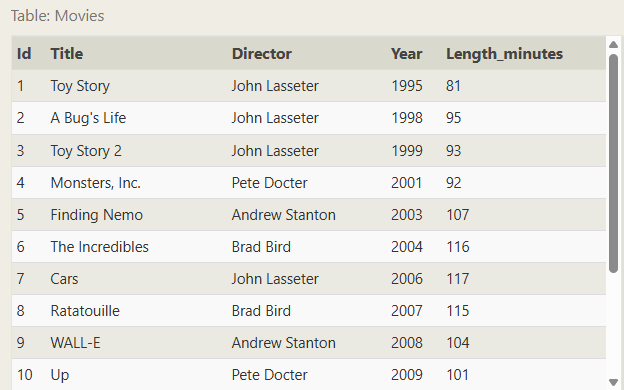

In [ ]:
SELECT * FROM Movies
    WHERE Title LIKE '%Toy Story%';

Cuando usamos la sentencia `WHERE` en columnas con texto, _SQL_ tiene varios operadores que nos permitirán hacer filtros con diferentes condiciones. Éstos están contenidos en la siguiente tabla.

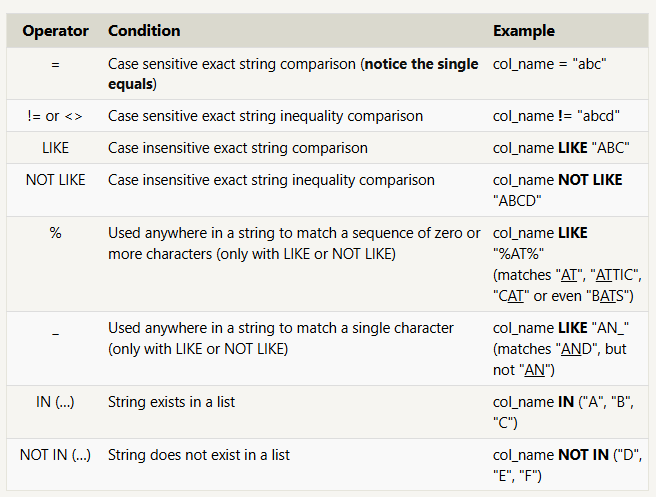